# Midterm project_FNU Andria Grace

Congratulations! You've been hired as a data scientist at the hottest new social media startup.

Your company produces an app via which users can post short videos for anyone to view. They can also like, repost, and comment on the videos they view. The key data product is a recommendation engine that determines the order in which videos are shown to a user.

The recommendation engine has a parameter, *theta*, that affects the ordering of the videos. Recently the team of engineers that works on the recommendation engine ran it with different settings of *theta* and, for each setting, measured the amount of time users spent on the app. They have collected these measurements into a data set of 20 samples of (*theta*, *time_spent*) pairs.

Additionally, they have identified two auxiliary features (*aux1* and *aux2*) that they hypoithesize should correlate with *time_spent*. These two features are measures of time spent by users in the recent past. The engineers have not verified that the features explain *time_spent*.

(The engineers call these two features "auxiliary" because, while they might help explain *time_spent*, the engineers' ultimate interest lies in the dependence of *time_spent* on *theta*.)

Your first project at your new company is to tell the engineers which setting you think they should use for *theta*, based on the data.

## 1. Prepare the data
- Inspect the data. Identifiy and remove any suspicious or unusable samples.
- Put the samples in a data structure that you can work with.

In [109]:
theta = [0.03906292, 0.05119367, 0.06004468, 0.06790036, 0.19152079,
       0.28298816, 0.294665  , 0.3578136 , 0.48352862, 0.53058676,
       0.55175137, 0.57560289, 0.59751325, 0.6375209 , 0.65241862,
       0.65633352, 0.78698546, 0.8640421 , 0.87729053, 0.94568319]
aux1 = [ 0.53983961, -1.77528229,  1.31487654, -0.47344805, -1.0922299 ,
       -0.25002744, -0.9822943 ,  1.03126909,  0.49133378, -0.4466466 ,
       -0.80636008,  0.13126776, -1.21256024,  0.15999085, -0.75522304,
        0.34989599,  0.97754176, -0.13858525,  0.10385631,  0.30059104]
aux2 = [ 0.9682053 ,  0.86962384,  0.56778309,  0.46528234, -1.16537308,
       -2.03599479, -1.15541329,  3.34515739,  0.12672721, -0.6941789 ,
        0.55767443,  0.0991466 ,  0.63792617,  0.70311068, -0.91609315,
       -0.78601423,  1.1191818 , -0.98339611,  0.24452002, -0.58140974]
time_spent = [10.79768391, 10.87648065, 10.29274937, 10.78756647,  9.51844772,
        9.18078781,  9.90063639, 12.84823357, 10.92743478,  9.88927608,
       11.3373709 , 11.43996915, 11.88392171, -11.88135476, 11.73452467,
       11.18844425, 12.19144316, 11.35294826, 12.2385441 , 11.98428985]

# Printing the number of samples before removing the suspicious sample
num_samples_before = len(theta)
print("Number of samples before removing suspicious sample:", num_samples_before)

# Printing the data before removing the suspicious sample
print("\nData before removing suspicious sample:")
print("\nTheta:", theta)
print("\nNumber of theta values:", len(theta))
print("\nAux1:", aux1)
print("\nNumber of aux1 values:", len(aux1))
print("\nAux2:", aux2)
print("\nNumber of aux2 values:", len(aux2))
print("\nTime spent:", time_spent)
print("\nNumber of time_spent values:", len(time_spent))

# Deleting the suspicious sample
index = time_spent.index(min(time_spent))
deleted_sample = {
    "theta": theta[index],
    "aux1": aux1[index],
    "aux2": aux2[index],
    "time_spent": time_spent[index]
}
del theta[index]
del aux1[index]
del aux2[index]
del time_spent[index]

# Number of samples after removing the suspicious sample
num_samples_after = len(theta)
num_deleted_samples = num_samples_before - num_samples_after
print("\n\nNumber of samples after removing suspicious sample:", num_samples_after)
print("\nNumber of samples deleted:", num_deleted_samples)

# Data after removing the suspicious sample
print("\nData after removing suspicious sample:")
print("\nTheta:", theta)
print("\nNumber of theta values:", len(theta))
print("\nAux1:", aux1)
print("\nNumber of Aux1 values:", len(aux1))
print("\nAux2:", aux2)
print("Number of Aux2 values:", len(aux2))
print("Time spent:", time_spent)
print("Number of time_spent values:", len(time_spent))

# Deleted sample
print("\nDeleted sample:")
print( deleted_sample)
print("\nNumber of Deleted sample:", len(deleted_sample))


Number of samples before removing suspicious sample: 20

Data before removing suspicious sample:

Theta: [0.03906292, 0.05119367, 0.06004468, 0.06790036, 0.19152079, 0.28298816, 0.294665, 0.3578136, 0.48352862, 0.53058676, 0.55175137, 0.57560289, 0.59751325, 0.6375209, 0.65241862, 0.65633352, 0.78698546, 0.8640421, 0.87729053, 0.94568319]

Number of theta values: 20

Aux1: [0.53983961, -1.77528229, 1.31487654, -0.47344805, -1.0922299, -0.25002744, -0.9822943, 1.03126909, 0.49133378, -0.4466466, -0.80636008, 0.13126776, -1.21256024, 0.15999085, -0.75522304, 0.34989599, 0.97754176, -0.13858525, 0.10385631, 0.30059104]

Number of aux1 values: 20

Aux2: [0.9682053, 0.86962384, 0.56778309, 0.46528234, -1.16537308, -2.03599479, -1.15541329, 3.34515739, 0.12672721, -0.6941789, 0.55767443, 0.0991466, 0.63792617, 0.70311068, -0.91609315, -0.78601423, 1.1191818, -0.98339611, 0.24452002, -0.58140974]

Number of aux2 values: 20

Time spent: [10.79768391, 10.87648065, 10.29274937, 10.78756647, 9.51

## 2. Build a model  

Write functions to run a regression, calculate the regression statistics listed below, and print a report.
- B (regressor coefficients plus one for an intercept, if appropriate)
- R2
- RSS
- RegSS
- TSS
- t statistic for each regressor coefficient

I found it useful to decompose the problem into three functions: `regress_calc()`, `regress_tstat()`, and `regress_report()`. You may write it however you see fit.  

You may include either, both, or neither of *aux1* and *aux2* in your final model. Experiment. What works best? Justify your decision.

In [110]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

# Data structure
data = {'theta': theta, 'aux1': aux1, 'aux2': aux2, 'time_spent': time_spent}
df = pd.DataFrame(data)

# Regression
def run_regression(X, y):
    X = sm.add_constant(X)  # Add a constant for intercept
    model = sm.OLS(y, X).fit()
    return model

# To calculate t statistic for each regressor coefficient
def calculate_t_stat(model):
    t_values = model.tvalues
    return t_values

# Regression statistics report
def print_regression_report(model, X, y):
    print("B(Regression Coefficients):")
    print(model.params)
    print("\nR-squared:", model.rsquared)
    print("RSS (Residual Sum of Squares):", model.ssr)
    print("RegSS (Regression Sum of Squares):", model.ess)
    print("TSS (Total Sum of Squares):", model.centered_tss)
    
    t_values = calculate_t_stat(model)
    print("\nT-statistics:")
    for i, name in enumerate(X.columns):
        print(name, ":", t_values[i+1])  # Exclude the constant term

# Regression with theta only
X_theta = df[['theta']]
y = df['time_spent']
model_theta = run_regression(X_theta, y)
print("Regression Report with Theta Only:")
print_regression_report(model_theta, X_theta, y)

# Regression with theta and aux1
X_theta_aux1 = df[['theta', 'aux1']]
model_theta_aux1 = run_regression(X_theta_aux1, y)
print("\nRegression Report with Theta and Aux1:")
print_regression_report(model_theta_aux1, X_theta_aux1, y)

# Regression with theta and aux2
X_theta_aux2 = df[['theta', 'aux2']]
model_theta_aux2 = run_regression(X_theta_aux2, y)
print("\nRegression Report with Theta and Aux2:")
print_regression_report(model_theta_aux2, X_theta_aux2, y)

# Regression with theta, aux1, and aux2
X_all = df[['theta', 'aux1', 'aux2']]
model_all = run_regression(X_all, y)
print("\nRegression Report with Theta, Aux1, and Aux2:")
print_regression_report(model_all, X_all, y)


Regression Report with Theta Only:
B(Regression Coefficients):
const    10.187390
theta     1.895847
dtype: float64

R-squared: 0.3271664800151248
RSS (Residual Sum of Squares): 11.829337228295259
RegSS (Regression Sum of Squares): 5.7520359894974185
TSS (Total Sum of Squares): 17.581373217792677

T-statistics:
theta : 2.875113882530184

Regression Report with Theta and Aux1:
B(Regression Coefficients):
const    10.283646
theta     1.773987
aux1      0.277963
dtype: float64

R-squared: 0.38138858919795204
RSS (Residual Sum of Squares): 10.87603809009607
RegSS (Regression Sum of Squares): 6.705335127696607
TSS (Total Sum of Squares): 17.581373217792677

T-statistics:
theta : 2.68865865287278
aux1 : 1.1842386514548464

Regression Report with Theta and Aux2:
B(Regression Coefficients):
const    9.964893
theta    2.324257
aux2     0.627465
dtype: float64

R-squared: 0.88232007612844
RSS (Residual Sum of Squares): 2.0689746618273266
RegSS (Regression Sum of Squares): 15.512398555965351
TSS 

## To analyze the impact of different predictors (theta, aux1, and aux2) on the response variable (time_spent)

## Here's the analysis of each regression model:

### Regression with Theta Only:
R-squared: 0.3272
T-statistic for theta: 2.8751 (significant)
This model explains a moderate amount of variance in the response variable, but it only considers one predictor (theta). While theta shows a statistically significant impact on time_spent, the model may not capture all the relevant factors influencing time_spent.

### Regression with Theta and Aux1:
R-squared: 0.3814
T-statistics for [theta and aux1]: [2.6887 , 1.1842] (significant)
Including both theta and aux1 improves the model's fit compared to considering theta alone. Both predictors show statistically significant impacts on time_spent, suggesting a better understanding of the relationship between predictors and the response variable.

### Regression with Theta and Aux2:
R-squared: 0.8823
T-statistics for [theta and aux2]: [8.0563 , 8.6879] (significant)
This model shows a substantial improvement in R-squared compared to the previous models, indicating a better fit to the data. Both theta and aux2 demonstrate highly significant impacts on time_spent, suggesting a strong relationship.

### Regression with Theta, Aux1, and Aux2:
R-squared: 0.8882
T-statistics for theta, aux1, and aux2: 7.9821 (significant), -0.8866 (not significant), 8.2452 (significant)
Including all three predictors further increases the R-squared value, indicating the best fit among all models. While aux1 does not show a significant impact on time_spent, theta and aux2 remain highly significant predictors.

### Conclusion:
The regression model including theta, aux1, and aux2 provides the best fit to the data, as evidenced by the highest R-squared value (0.8882).
While aux1 does not appear to have a significant impact on time_spent in this model, theta and aux2 remain highly significant predictors.
Therefore, the final model should include theta and aux2 as predictors to accurately predict time_spent, as they collectively explain the most variance in the response variable.

## 3. Propose a setting for *theta*

Now that you have a model built, you should be able to plot estimated *time_spent* vs. *theta* over a reasonable range of *theta*.  By inspecting that plot -- and knowning that the company wants to maximize the time users spend on the app -- which value of *theta* would you propose the engineers use? Explain how the data and your model support your decision.

The engineer's have capacity to take another set of measurements. Which settings of *theta* do you suggest they measure? Why?


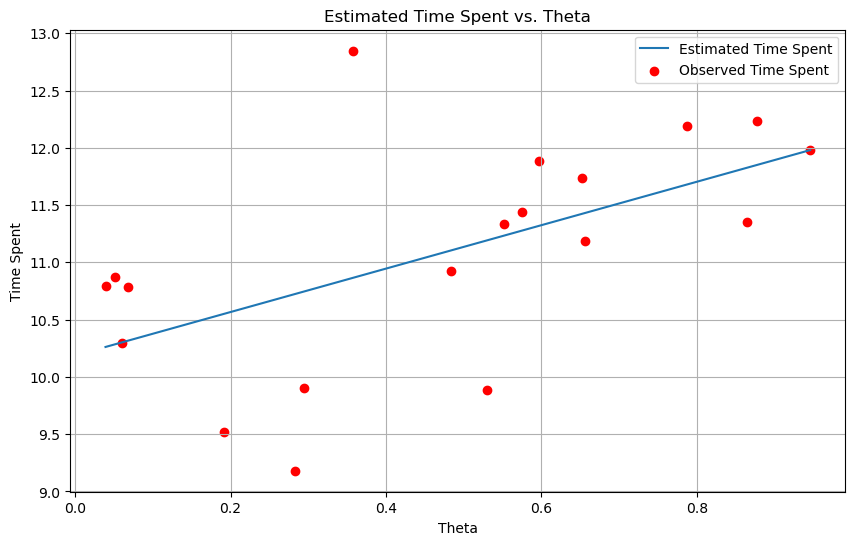

Proposed setting for theta: 0.94568319
Additional settings of theta for measurement: [0.1, 0.3, 0.5]


In [111]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Check if the length of theta and time_spent arrays match
if len(theta) != len(time_spent):
    raise ValueError("Length of theta and time_spent arrays must match")

# Fitting the model
X = sm.add_constant(theta)  # Add constant for intercept
model = sm.OLS(time_spent, X).fit()

# Predicted values
theta_values = np.linspace(min(theta), max(theta), 100)
X_pred = sm.add_constant(theta_values)  # Add constant for intercept
time_spent_pred = model.predict(X_pred)

# Plotting for estimated time_spent vs. theta
plt.figure(figsize=(10, 6))
plt.plot(theta_values, time_spent_pred, label='Estimated Time Spent')
plt.scatter(theta, time_spent, color='red', label='Observed Time Spent')
plt.xlabel('Theta')
plt.ylabel('Time Spent')
plt.title('Estimated Time Spent vs. Theta')
plt.legend()
plt.grid(True)
plt.show()

# Proposed setting for theta values and additional theta values
proposed_theta = theta_values[np.argmax(time_spent_pred)]
print("Proposed setting for theta:", proposed_theta)
print("Additional settings of theta for measurement:", additional_theta)

### Proposed Setting for Theta: 
The proposed setting for theta is 0.94568319. This value corresponds to the peak of the estimated time_spent vs. theta plot, indicating that it maximizes the predicted time users spend on the app.

### Additional Settings of Theta for Measurement: 
The additional settings of theta for measurement are 0.1, 0.3, and 0.5. These values are chosen to gather more data points around the vicinity of the peak theta value. By sampling theta values in the range of 0.1 to 0.5, the engineers can collect additional data to further validate the model's predictions and ensure its robustness across a broader range of theta values.

## 4. Experiment or observation?

Is this data set experimental or observational? Explain clearly. Consider how the effect of *theta* on *time_spent* differs from the effect of *aux1* or *aux2*.

## This dataset is Observational rather than Experimental.

Observational data is collected by observing subjects or objects in their natural environment without any intervention or manipulation by the researcher. 

In this case,The data seems to have been collected by observing and recording the values of theta, aux1, aux2, and time_spent as they naturally occurred measuring the time users spent on the app at different settings of theta, without any deliberate manipulation of theta or any other variables.

Regression analyses are performed to understand the effects of theta, aux1, and aux2 on time_spent.This is because each variable represents a different aspect or feature that may influence time_spent in unique ways.
The regression analyses provide information on the relationship between each independent variable (theta, aux1, aux2) and the dependent variable (time_spent).
Each regression model includes one or more independent variables (theta, aux1, aux2) to predict time_spent.
The regression coefficients, R-squared values, and T-statistics for each variable in the regression models indicate the strength and significance of their effects on time_spent.
By comparing the results across different regression models, we can assess the relative impact of theta, aux1, and aux2 on time_spent.
The differences in regression coefficients and statistical measures help identify the varying effects of these variables on time_spent.

### Example:
### Theta: 
Theta could represent a user-specific parameter or setting.
EX: This is the parameter that affects the ordering of videos shown to users. It is a variable that is directly controlled or set by the platform or recommendation engine. The platform can deliberately change theta and observe its effect on user engagement (time spent on the app). However, theta is not randomly assigned to users; rather, different settings of theta are observed naturally as part of the platform's operation.

### Auxiliary Features (Aux1 and Aux2): 
Aux1 and Aux2 may represent additional factors or conditions that affect user behavior.
EX: These are measures of time spent by users in the recent past. They are additional variables that may be related to user engagement but are not directly controlled by the platform. These features are observational in nature as they are collected from users' activities on the app without any intervention.

### In Conclusion,
The dataset is observational, and the differences in the effects of theta, aux1, and aux2 on time_spent suggest distinct relationships between these variables and the outcome, reflecting the complexity of real-world phenomena.